In [1]:
import pandas as pd
import numpy as np

# Read Dataset from csv file

In [2]:
survey_raw_df = pd.read_csv('./survey_results_public.csv')
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [3]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

The dataset contains 64.461 respondent and 60 question ( in which some questions are optional)

We can refer to the schema file to see the full text of each question.
The schema file contains only two columns: Column and QuestionText.


In [4]:
schema_raw = pd.read_csv('./survey_results_schema.csv', index_col='Column').QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

# Data Preparation & Cleaning
- While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions
- Let's select a subset of columns with the relevant data for our analysis.

In [5]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [6]:
len(selected_columns)

20


Let's extract a copy of the data from these columns into a new data frame survey_df.
We can continue to modify further without affecting the original data frame.

In [7]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
schema = schema_raw[selected_columns]
schema
                   


Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

Let's view some basic information about the data frame.

In [9]:
survey_df.shape

(64461, 20)

Let's view some important imformation in Dataframe

In [10]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN.

In [11]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now view some basic statistics about numeric columns.

In [12]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279.
This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding.
A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the .drop method

In [13]:
survey_df.drop(survey_df[survey_df.Age <10].index, inplace= True)
survey_df.drop(survey_df[survey_df.Age >100].index, inplace= True)

In [14]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


The same holds for WorkWeekHrs. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [15]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace= True)


The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis

In [16]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [17]:
survey_df.where(~(survey_df.Gender.str.contains(';', na= False)),np.nan, inplace= True)

In [18]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.



In [19]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
52810,United States,NaN,Man,Some college/university study without earning ...,"A social science (such as anthropology, psycho...",Yes,16.0,20.0,13.0,Bash/Shell/PowerShell;HTML/CSS;Java;Perl;Pytho...,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Engineer, data;Engineer, site reliability;Engi...",50.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
36643,Israel,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
50954,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,5.0,2.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, full-stack",NaN,Very satisfied,NaN,Often: 1-2 days per week or more,Very important
2866,Slovenia,28.0,Man,Some college/university study without earning ...,"Information systems, information technology, o...",Yes,20.0,7.0,7.0,C#;Go;PHP;SQL,C#;Go;Rust;SQL;TypeScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,Industry that I’d be working in;Opportunities ...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
60053,Brazil,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,18.0,9.0,7.0,Bash/Shell/PowerShell;C;Dart;HTML/CSS;Java;Jav...,Dart,Once every few years,Visit Stack Overflow,Employed full-time,"Developer, back-end",50.0,Slightly satisfied,Financial performance or funding status of the...,Often: 1-2 days per week or more,Very important
53360,Japan,51.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,14.0,28.0,NaN,Assembly;Bash/Shell/PowerShell;C;Haskell;Python,Assembly;Haskell;Python,Every few months,Call a coworker or friend;Visit Stack Overflow...,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Somewhat important
48376,Colombia,35.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,15.0,11.0,C#;HTML/CSS;Java;JavaScript;Kotlin;Python;SQL;...,HTML/CSS;Java;JavaScript;Kotlin;Scala;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important
4318,United States,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,No,15.0,2.0,1.0,Bash/Shell/PowerShell;Python;R,Bash/Shell/PowerShell;Julia;Python;R;Ruby,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Academic researcher,40.0,Neither satisfied nor dissatisfied,NaN,Rarely: 1-2 days per year or less,Critically important
12362,India,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,13.0,10.0,C;C#;C++;HTML/CSS;Java;JavaScript;Ruby,Go;HTML/CSS;JavaScript;TypeScript,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, full-stack",10.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Financial per...,Sometimes: 1-2 days per month but less than we...,Very important
42162,United Kingdom,37.0,Woman,"Secondary school (e.g. American high school, G...",NaN,Yes,6.0,30.0,19.0,HTML/CSS;JavaScript;Perl;PHP;Python,HTML/CSS;JavaScript;PHP;Python;TypeScript,Once a year,Call a coworker or friend;Go for a walk or oth...

# Exploratory Analysis and Visualization

Let's begin by importing matplotlib.pyplot and seaborn

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country 

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses

In [21]:
schema.Country


'Where do you live?'

In [22]:
survey_df.Country.nunique()


183

We can identify the countries with the highest number of respondents using the value_counts method.

In [23]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize this information using a bar chart.

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

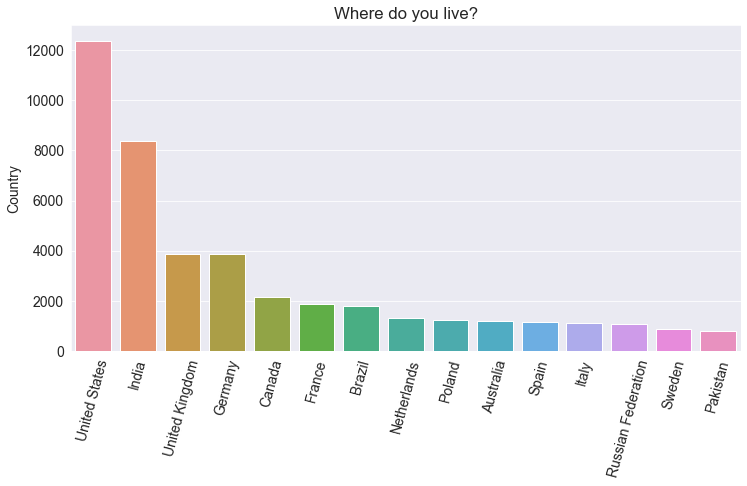

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries)

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

# Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it.

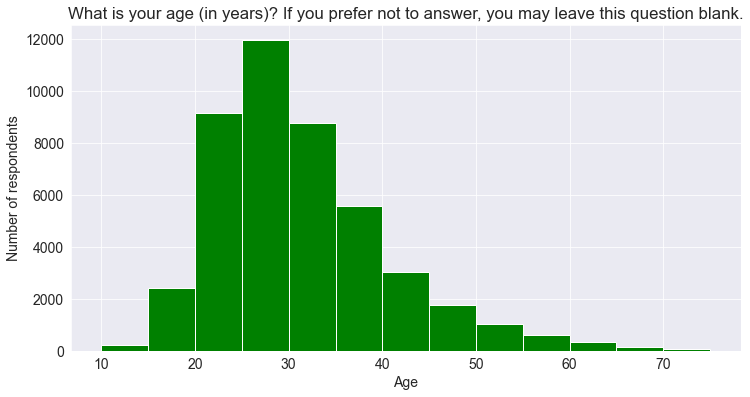

In [25]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='green');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years

# Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [26]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [27]:
gender_counts = survey_df['Gender'].value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie chart is good way to visualize the distribution

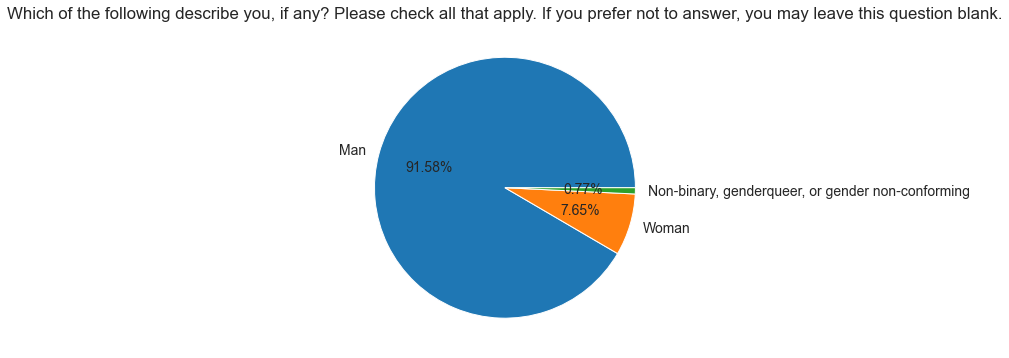

In [28]:
plt.figure(figsize= (12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct= '%.2f%%')
plt.show()


It is obviously that the rate of man is highest with 91.58%, huge difference compared to the proportion of woman and Non-binary, this is in line with reality

# Education Level

- In reality, education with computer science usually require university level and than more. However, there are
many free resources and tutorials online to learn programming.
- Let's compare education level of respondent

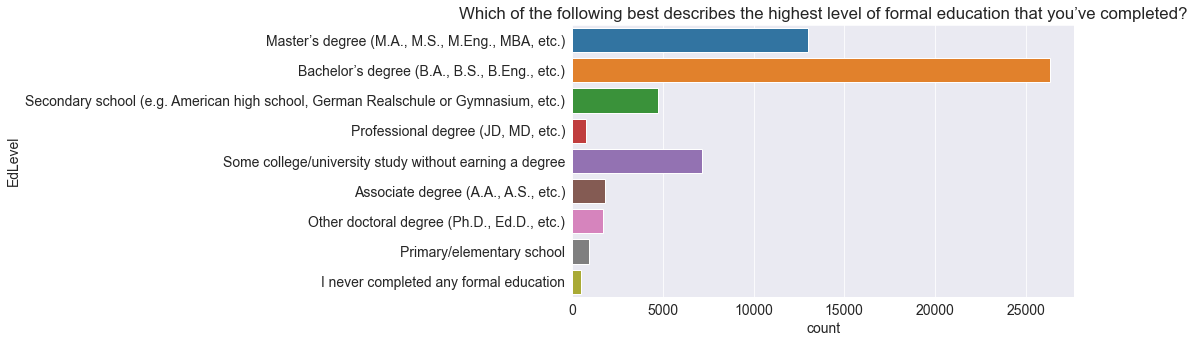

In [29]:
sns.countplot(y = survey_df['EdLevel'])
plt.title(schema.EdLevel)
plt.show()

It's clear that the highest the rate is Bachlor's degree and Master's degree and Most of the college graduate programmers. However, a small amount of programmers who college study without earning a degree

# Employment

In [30]:
schema.Employment

'Which of the following best describes your current employment status?'

In [31]:
employment_count = survey_df.Employment.value_counts(normalize= True, ascending= True)*100
employment_count

Retired                                                  0.380162
Not employed, and not looking for work                   0.501625
Employed part-time                                       3.470360
Not employed, but looking for work                       3.665962
Independent contractor, freelancer, or self-employed     8.863615
Student                                                 12.199893
Employed full-time                                      70.918383
Name: Employment, dtype: float64

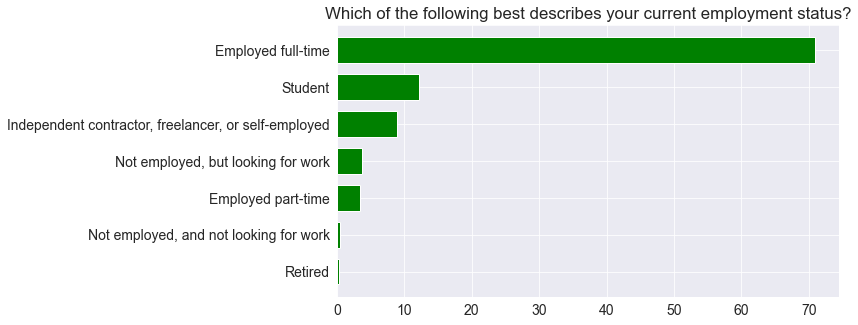

In [32]:
plt.barh(employment_count.index, employment_count, height= 0.7, color = 'g')
plt.title(schema.Employment)
plt.show()

The bar chart shows that the rate of Employed full time is the the highest over 70 percent in total, after that about 10 percent is independent contractor, freelancer or self-employed. The lowest of this rate is Retired and not employed and not looking for work

# Asking and Answering Quesion


We've gained several insights about the respondents and programming community by explore individual column in dataset. Let's ask some specific question and try annswering that question


1. Question 1: What is the most popular programming languages in 2020?

Before we find answer this question, let's build a function that turn a column contains list of values from dataframe with one column for each position option

In [43]:
# def split_multicolumn(col_series):
#     result_df = col_series.to_frame()
#     options = []
#     for index, value in col_series[col_series.notnull()].iteritems():
#         for option in value.split(';'):
#             if not option in result_df.columns:
#                 options.append(option)
#                 result_df['options'] = False
#             result_df.at[index, value] = True
#     return result_df        
                
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]        
        

In [34]:
survey_df.LanguageWorkedWith 

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [44]:
language_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)


In [45]:
language_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It's appear that a total of 25 language were included among the options. Let's aggregate these to identify the proportion of respondents who selected each language

In [47]:
language_worked_rate = language_worked_df.mean().sort_values(ascending = False)*100
language_worked_rate

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

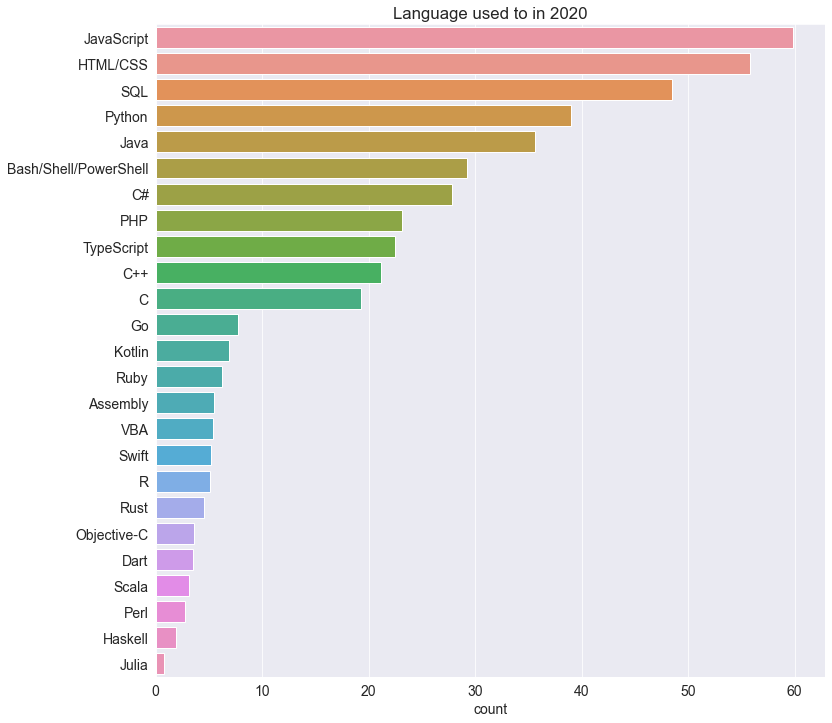

In [58]:
plt.figure(figsize= (12,12))
sns.barplot(x = language_worked_rate, y= language_worked_rate.index)
plt.title('Language used to in 2020')
plt.xlabel('count')
plt.show()

From the bar chart, it's shown that Javascrip is the most used language. After that is HTML/CSS, this is in line with reality
SQL and python also are very important, standing in the top 2. The group of least used language is from Go to Julia

Question 2: Which languages are the most people interested to learn over the next year?

For this, we can use LanguageDesireNextYear column, with similar processing as the previous one

In [59]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [60]:
language_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
language_interested_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
language_interested = language_interested_df.mean().sort_values(ascending=False)*100
language_interested

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

Text(0.5, 1.0, 'Languages are the most interested in next year')

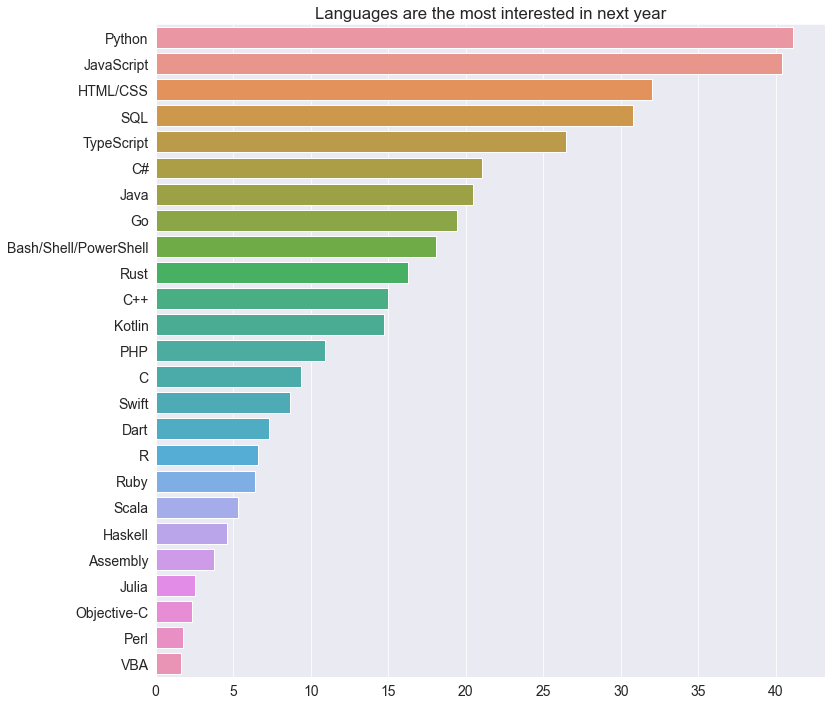

In [62]:
plt.figure(figsize=(12,12))
sns.barplot(x= language_interested, y=language_interested.index)
plt.title('Languages are the most interested in next year')

In this bar chart, the rate has not been changed quite a lot then the rate of used language in 2020.Typically, python is the highest interested language, then is Javascip,no surprise because Javascrip is a very popular language in the 2020.After that is HTML/CSS and SQL in top 2. The top 4 language no change, it just change the position each other

Question3:  Which are the most loved languages,that is  a high percentage of people who have used the language want to continue learning & using it over the next year?

- Create a new data frame language_loved_df that contains a true value only if the corresponding value in  language_worked_df and language_interested both true
- Take the column sum of language_loved and divide it by sum of language_worked, we have the proportion of respondents who love the language


In [63]:
language_loved_df = language_worked_df & language_interested_df
language_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
language_love = language_loved_df.sum()*100/ language_worked_df.sum()
language_love = language_love.sort_values(ascending = False)
language_love

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

Let's visualize by bar chart

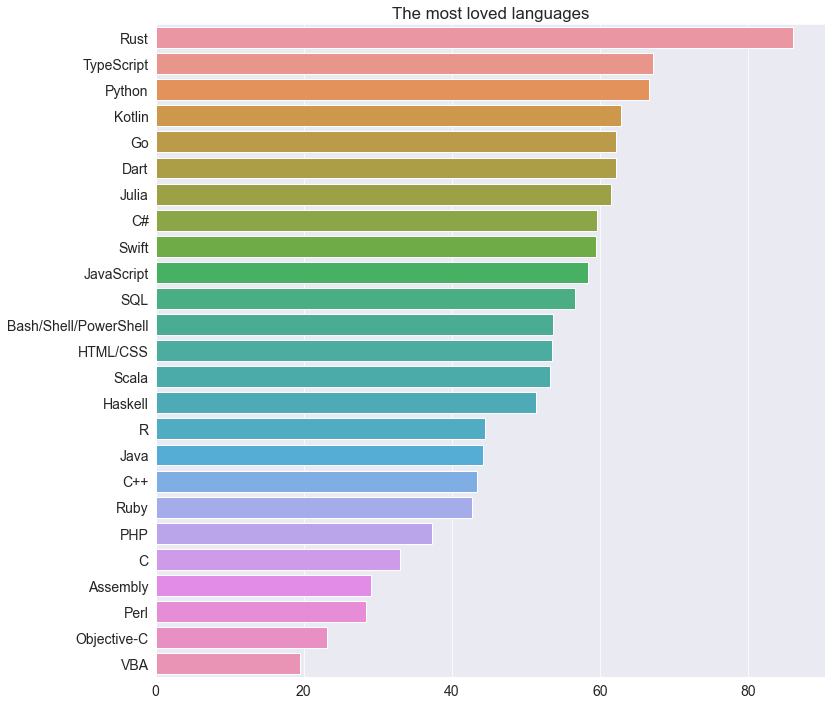

In [70]:
plt.figure(figsize=(12,12))
sns.barplot(x = language_love, y=language_love.index)
plt.title('The most loved languages')
plt.show()

Rust the most loved language but it not the group most popular languages like Javascrip, python, SQL or HTML/CSS. Especially that Javascrip, SQL and HTML/CSS hardly liked much

Question 4: In which countries do developers work the highest number of hours per week? Consider contries with more than 250 responses only

In [75]:
countries_df = survey_df.groupby(by = 'Country')[[ 'WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending= False)

In [78]:
high_response_contries_df = countries_df.loc[survey_df.Country.value_counts() > 250].reset_index().head(15)
high_response_contries_df

,Country,WorkWeekHrs
0,Iran,44.337748
1,Israel,43.915094
2,China,42.150000
3,United States,41.802982
4,Greece,41.402724
5,Viet Nam,41.391667
6,South Africa,41.023460
7,Turkey,40.982143
8,Sri Lanka,40.612245
9,New Zealand,40.457551


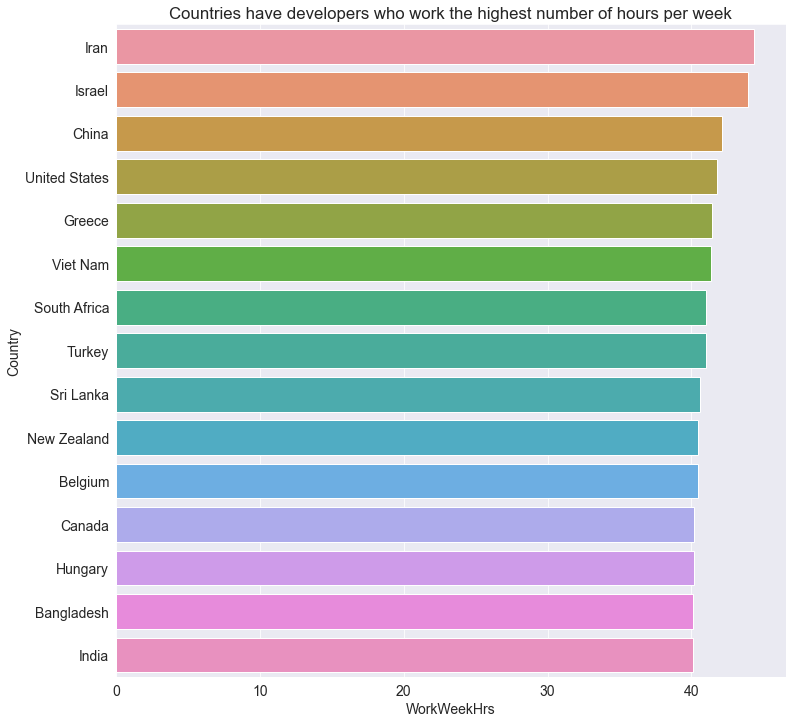

In [79]:
plt.figure(figsize = (12,12))
sns.barplot(data = high_response_contries_df, x='WorkWeekHrs',y= 'Country')
plt.title('Countries have developers who work the highest number of hours per week')
plt.show()

The bar chart shows that coutries have developers who work the number highest hours of per week is Iran, Irael, these countries have so high rate. Generally,there is not much difference between coutries

Question 5: How important is it to build programming career from young?

Let's create a scatter plot of Age and Age1stCode to answer this question

In [81]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

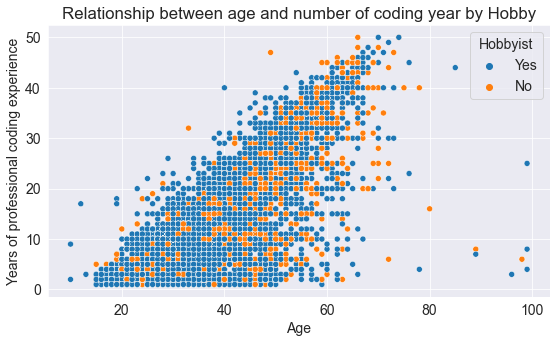

In [82]:
sns.scatterplot(x= 'Age', y= 'YearsCodePro', data=survey_df, hue= 'Hobbyist')
plt.title('Relationship between age and number of coding year by Hobby')
plt.xlabel('Age')
plt.ylabel('Years of professional coding experience')
plt.show()

The scatter plot shows that you can become professional programmer at any age and  for many people it like hobby

We can also see the distribution of the age to start coding by Age1stCode column

In [84]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

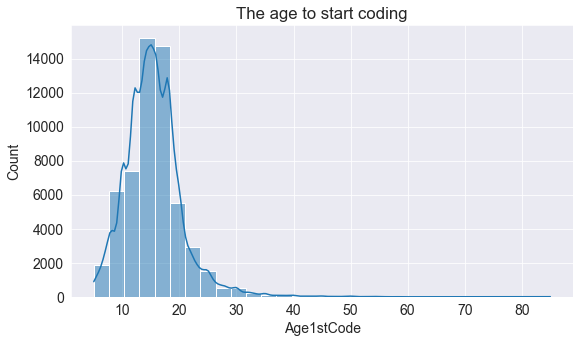

In [86]:
sns.histplot(data= survey_df, x='Age1stCode', bins= 30, kde= True)
plt.title('The age to start coding')
plt.show()

The histogram shows that almost of developers start coding very early,especially from 15 to 25 age. In addition, the rate of people learning to code from `0 years old is also quite high